## 1. Google Play Store - apps e reviews
<p>Aplicativos mobile estão em todos os lugares. Eles são fáceis de criar e podem ser lucrativos. Por conta destes dois fatores, cada vez mais aplicativos são criados. Neste notebook será feita uma análise do mercado de aplicativos Android utilizando dados de milhares de aplicativos do Google Play distribuídos em diversas categorias.</p>
<p>Os dados utilizados se dividem em dois arquivos:</p>
<ul>
<li><code>apps.csv</code>: contém detalhes das aplicativos no Google Play. Há 13 atributos que descrevem um dado aplicativo.</li>
<li><code>user_reviews.csv</code>: contém 100 reviews para cada aplicativo, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">mais relevantes primeiros</a>. O texto em cada review foi pré-processado com adição de três novos atributos : Sentiment (Positive, Negative or Neutral), Sentiment Polarity e Sentiment Subjectivity.</li>
</ul>

In [4]:
# lendo arquivo apps.csv em um dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('apps.csv', sep= ',')

# removendo linhas duplicadas de apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# imprimindo o número total de aplicativos 
print('Total number of apps in the dataset = ', len(apps))
# visualizando uma amostra aleatória de 5 linhas
print(apps.sample(5))

Total number of apps in the dataset =  9659
      Unnamed: 0                             App            Category  Rating  \
5491        6503              BNCR Token Celular             FINANCE     3.7   
8634        9776  Nose Surgery ER Simulator Lite              FAMILY     3.1   
1106        1340   Calm - Meditate, Sleep, Relax  HEALTH_AND_FITNESS     4.6   
1175        1452      Homes.com 🏠 For Sale, Rent      HOUSE_AND_HOME     4.0   
6032        7074             WISE- MOBILE PORTAL               TOOLS     NaN   

      Reviews  Size    Installs  Type Price Content Rating            Genres  \
5491      913   0.1    100,000+  Free     0       Everyone           Finance   
8634      269  39.0     50,000+  Free     0           Teen       Educational   
1106   111450   NaN  5,000,000+  Free     0       Everyone  Health & Fitness   
1175     6000  18.0  1,000,000+  Free     0       Everyone      House & Home   
6032        3   1.0        500+  Free     0       Everyone             Tool

## 2. Limpeza de dados
<p>Limpeza de dados é uma das tarefas mais essenciais em um projeto de data science.</p>
<p>Observando a amostra de linhas do dataset podemos notar a presença de algumas entradas nas colunas <code>Installs</code> e <code>Price</code> contendo caracteres especiais (<code>+</code> <code>,</code> <code>$</code>). Isto faz com que estas colunas não possam ser tratadas corretamente por meio de cálculos matemáticos ( por serem uma string ).</p>
<p>Na limpeza de dados removeremos os caracteres especiais <code>,</code> e <code>+</code> presentes na coluna <code>Installs</code> e <code>$</code> presente na coluna <code>Price</code>.</p>
<p>É uma boa prática imprimir um resumo do dataframe após completar a limpeza. Para isto será utilizado o método <code>info()</code>.</p>

In [5]:
# lista dos caracteres a serem removidos
chars_to_remove = ['+', ',', '$']
# lista dos nomes das colunas a serem tratadas
cols_to_clean = ['Installs', 'Price']

# laço para cada coluna na lista cols_to_clean
for col in cols_to_clean:
    # laço para cada caracter na lista chars_to_remove
    for char in chars_to_remove:
        # substituindo o caracter especial por string vazia
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# imprimindo um resumo do dataset após tratamento
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


## 3. Corrigindo tipos de dados
<p>Da tarefa anterior, podemos notar que as colunas <code>Installs</code> e <code>Price</code> foram categorizadas com o tipo de dado <code>object</code> (e não <code>int</code> ou <code>float</code>) como desejado. Isto ocorre por que originalmente estas duas colunas continham entradas mistas de dados : números e caracteres especiais.</p>
<p>Os quatro atributos que serão tratados com maior frequência são : <code>Installs</code>, <code>Size</code>, <code>Rating</code> e <code>Price</code>. Enquanto <code>Size</code> e <code>Rating</code> são ambos <code>float</code>, nós ainda precisamos trabalhar com <code>Installs</code> e <code>Price</code> para torná-los numéricos.</p>

In [6]:
import numpy as np

# convertendo a coluna Installs para tipo float
apps['Installs'] = apps['Installs'].astype('float64')

# convertendo a coluna Price para tipo float 
apps['Price'] = apps['Price'].astype('float64')

# checando dtypes do dataframe apps 
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB
None


## 4. Explorando categorias

<ul>
<li>Qual categoria tem a maior quantidade de aplicativos no mercado? </li>
<li>Há alguma categoria dominando o mercado?</li>
<li>Quais categorias tem o menor número de aplicativos?</li>
</ul>
<p>Observamos <code>33</code> categorias presentes em nosso dataset. <em>Family</em> e <em>Game</em> tem as mais altas prevalecências de mercado. <em>Tools</em>, <em>Business</em> e <em>Medical</em> também estão no topo.</p>

Number of categories =  33


<AxesSubplot: >

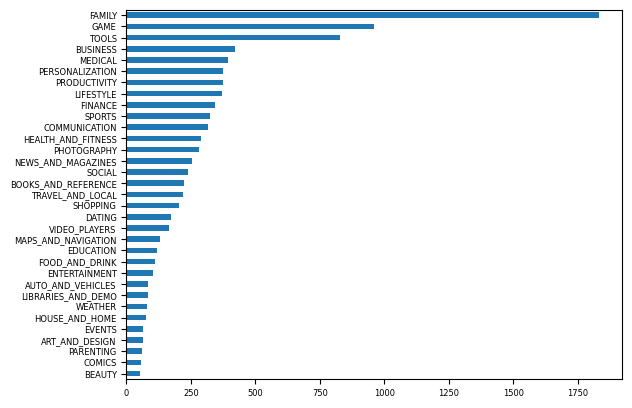

In [7]:
# imprimindo o número total de categorias
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# criando um subset com o total de aplicativos por categoria
sorted_num_apps_in_category = apps['Category'].value_counts().sort_values()

# plotando gráfico de barras com o total de aplicativos por categoria
sorted_num_apps_in_category.plot(kind = 'barh', fontsize=6)


## 5. Distribuição das avaliações de aplicativos
<p>Em uma escala de 1 a 5, avaliações são um importante indicador de performance de um aplicativo.</p>
<p>A partir dos dados disponíveis, observamos que a média de avaliações entre os aplicativos foi de  <code>4.17</code>. O histograma tem calda a esquerda, indicando uma concentração de boas avaliações dos aplicativos.</p>

Average app rating =  4.173243045387994


<AxesSubplot: xlabel='Rating', ylabel='Count'>

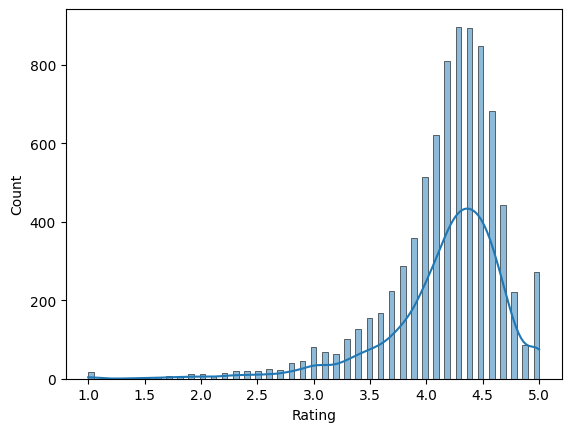

In [8]:
import seaborn as sns

# calculando a avaliação média dos aplicativos
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# plotando histograma com a distribuição de avaliações e kde
sns.histplot(data = apps, x = 'Rating', kde=True)



## 6. Tamanho e preço de um aplicativo
<p>Agora vamos analisar o tamanho e o preço de um aplicativo. Se um aplicativo for muito grande, pode ser difícil para usuários fazerem seu download ou até mesmo diminuir o interesse no aplicativo. Quanto a preço, alguns usuários esperam que seus aplicativos sejam gratuitos ou de baixo custo.</p>
<p>Como avaliar estratégias baseadas em tamanho ou preço de um aplicativo?</p>
<ul>
<li>O tamanho de um aplicativo afeta sua avaliação? </li>
<li>Os usuários preferem aplicativos mais leves ou o tamanho não interfere em suas escolhas? </li>
<li>O preço de um aplicativo interfere em sua avaliação? </li>
<li>Os usuários preferem aplicativos gratuitos a aplicativos pagos?</li>
</ul>
<p>Podemos observar que a maior parte dos aplicativos mais bem avaliados ( avaliação acima de 4 ) tem tamanho entre 2 MB e 20 MB. Também pode ser observado que a grande maioria dos aplicativos custa menos de 10 dólares.</p>

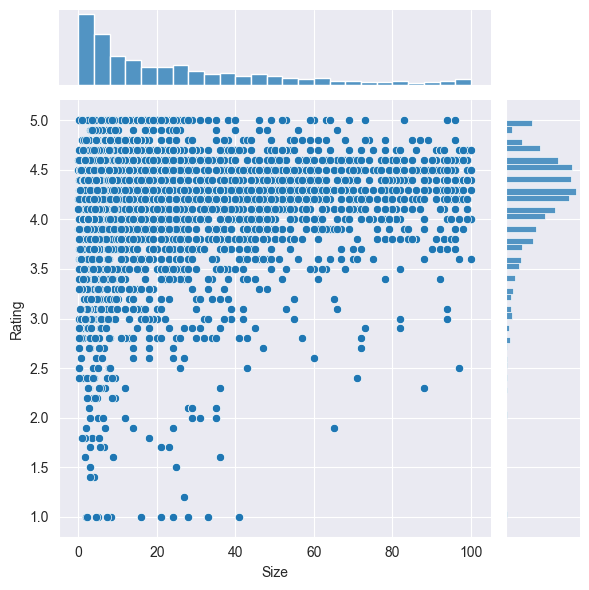

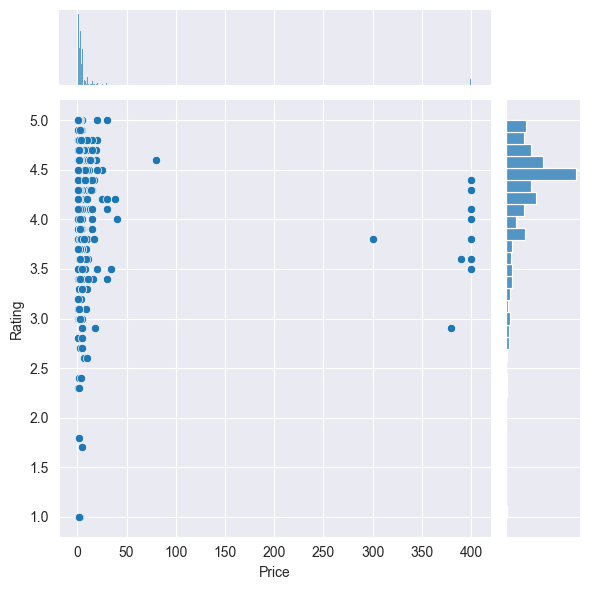

In [9]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
# selecionando linhas nas quais os valores de 'Rating' e 'Size' não são nulos 
apps_with_size_and_rating_present = apps[pd.notnull(apps['Rating']) & pd.notnull(apps['Size'])]

# subset para categorias com pelo menos 250 aplicativos
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

# plotando size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])
# selecionando os aplicativos nos quais 'Type' é 'Paid' ( aplicativos que são pagos )
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']

# plotando price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 7. Relação entre categoria e preço de um aplicativo
<p>Os custos de aplicativos são baseados em funções, complexidade e plataforma.</p>
<p>Diferentes categorias demandam diferentes intervalos de preços. Alguns aplicativos simples, como uma calculadora, devem ser gratuitos enquanto outros altamente especializados, como aplicativos médicos para diagnóstico de diabetes, devem ser precificados de acordo. Abaixo podemos observar que aplicativos nas categorias <em>Medical e Family</em> são os mais caros. Enquanto alguns aplicativos médicos superam oitenta dólares, os aplicativos de jogos tem valores abaixo de vinte dólares.</p>

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


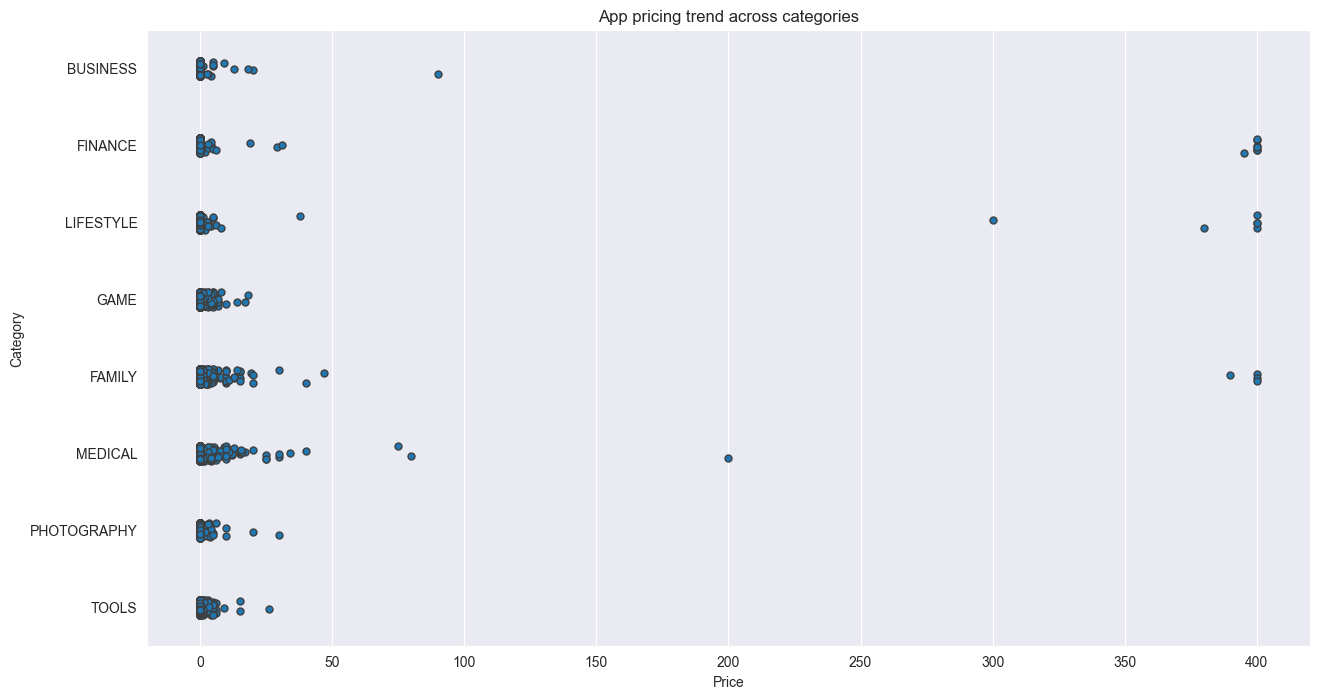

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# selecionando algumas categorias populares de aplicativos
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# plotando distribuição de Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# listando aplicativos cujo valor é superior a 200 dólares
apps_above_200 = apps[apps['Price']>200]
apps_above_200[['Category', 'App', 'Price']]

## 8. Filtrando aplicativos "lixo"
<p>Observando a lista de aplicativos mais caros, verificamos que alguns tratam-se de aplicativos "lixo" (junk apps), ou seja, aplicativos sem utilidade.Aplicativos como <em>I Am Rich Premium</em> ou <em>most expensive app (H)</em> podem ter sido criados como uma piada ou para testar as habilidades de seu desenvolvedor.</p>
<p>Filtrando estes aplicativos "lixo" podemos refazer a visualização anterior. O critério para o filtro será de aplicativos com preço inferior a 100 dólares.</p>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

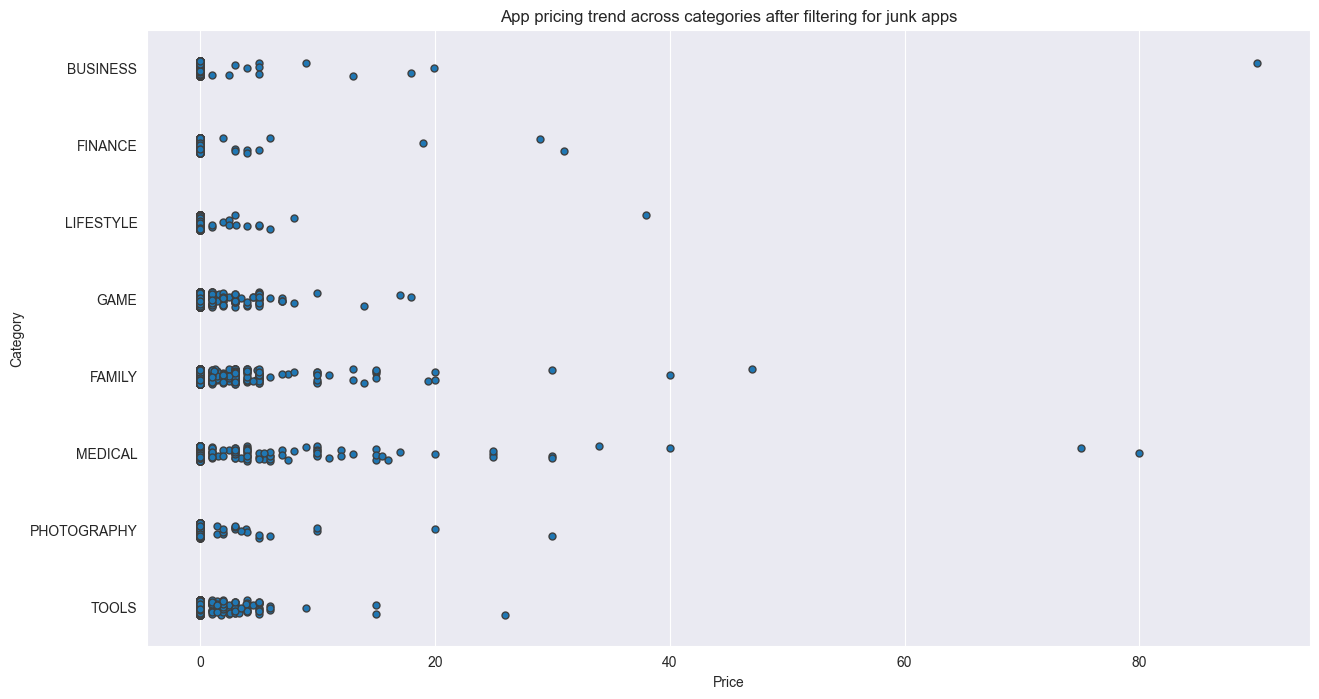

In [11]:
# selecionando aplicativos com preço inferior a 100 dólares
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# plotando distribuição de Price vs Category, após o filtro (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 9. Análise de opinião das avaliações dos usuários
<p>A avaliação de usuários pode ser analisada para identificar se imagem de um aplicativo é positiva, neutra ou ruim. Por exemplo, uma avaliação positiva poderia incluir palavras como : incrível, amigável, bom ou ótimo. Palavras negativas poderiam ser : detestei, ruim, problemático ou incompetente.</p>
<p>Plotando a distribuição da polaridade de impressões dos usuários para aplicativos gratuitos e pagos, observamos que os aplicativos gratuitos recebem uma quantidade maior de críticas, o que pode ser notado pelas outliers no eixo y. Aparentemente aplicativos pagos não tem avaliações extremamente negativas, o que talvez indique uma maior qualidade dos aplicativos pagos.</p>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

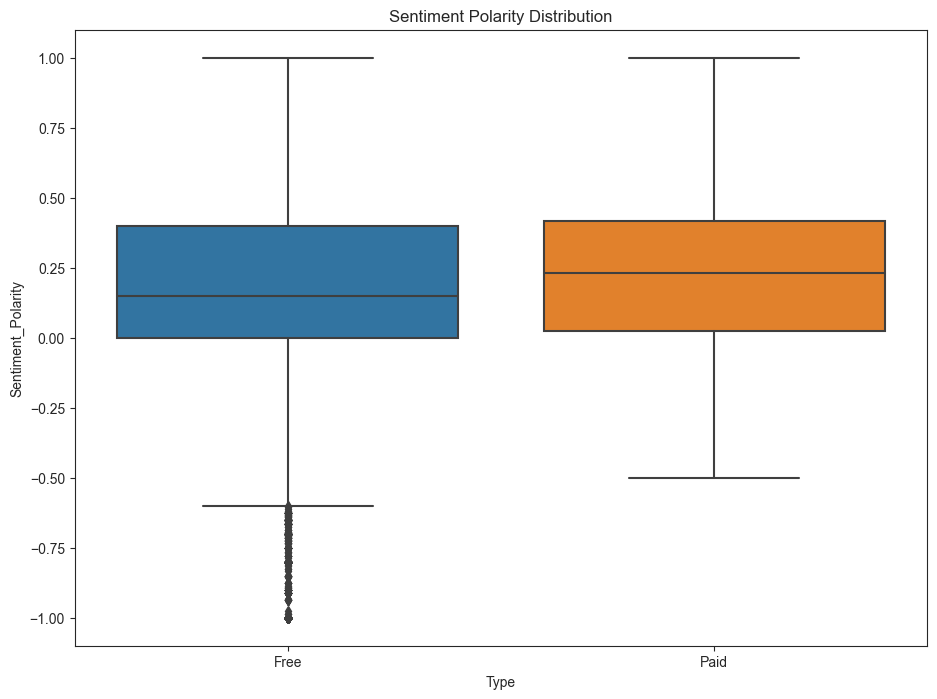

In [12]:
# carregando o arquivo user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# unindo os dois dataframes
merged_df = apps.merge(reviews_df)

# eliminando valores NA das colunas Sentment e Review
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# plotando a distribuição de polaridade de impressão dos usuários de aplicativos gratuitos e pagos
ax = sns.boxplot(x = 'Type' ,y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')